# Case Study 2

## Guiding Question: How can we build a model to predict the gross of a movie?

Today, we're going to be looking at movie data from the highest grossing movies.

In [203]:
import pandas as pd
movies = pd.read_csv("/Users/aniketarahane/Downloads/highest_gr_movies_2022.csv")
movies

,Rank,Release,Gross,max_th,Opening,perc_tot_gr,open_th,Open,Close,Distributor,int_gross,world_gross
0,1,Top Gun: Maverick,718732821,4751,126707459,17.6,4735,2022-05-27,2022-12-16,Paramount Pictures,7.700000e+08,1488732821
1,2,Avatar: The Way of Water,636955746,4340,134100226,21.1,4202,2022-12-16,NaN,20th Century Studios,1.539273e+09,2176229105
2,3,Black Panther: Wakanda Forever,453474324,4396,181339761,40.0,4396,2022-11-11,NaN,Walt Disney Studios Motion Pictures,3.892767e+08,842750982
3,4,Doctor Strange in the Multiverse of Madness,411331607,4534,187420998,45.6,4534,2022-05-06,NaN,Walt Disney Studios Motion Pictures,5.444442e+08,955775804
4,5,Jurassic World: Dominion,376851080,4697,145075625,38.5,4676,2022-06-10,2022-09-23,Universal Pictures,6.251270e+08,1001978080
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Mad God,325042,37,8416,2.6,2,2022-06-10,NaN,IFC Films,3.250420e+05,8416
196,197,Clean,318877,254,162098,50.8,254,2022-01-28,NaN,IFC Films,3.188770e+05,162098
197,198,Waterman,316848,44,65753,20.8,13,2022-04-01,NaN,Purdie Distribution,1.998600e+04,336834
198,199,Meet Me in the Bathroom,307000,157,86071,28.0,4,2022-11-04,NaN,Utopia,3.070000e+05,86071


One of the simplest but also most powerful models we can use for prediction is simple linear regression. 

## The Model

### Train/Test

Simple linear regression is a supervised machine learning model. Machine learning models are models that try to predict something. Machine learning models are generally split into supervised models and unsupervised models. Supervised models are models that require data to learn from and then make predictions based on that information. Unsupervised models make predictions without learning from given data. We are focusing on supervised learning. When we do supervised learning, we split the data we have into a test and training data set. The training dataset is what we use to build our model and then the test dataset we use to evaluate how well our model performs. 

### The Linear Model

The true relationship between X and Y meaning if we have all the data takes on the form:
$$y = \beta_0 + \beta_1x + \epsilon$$

We call x a predictor because it is what we base our predictions on.$\beta_0$ is the intercept of the line where x = 0. $\beta_1$ is the slope of the line. $\epsilon$ is an irreducible error term. This error term is distributed according to a Normal distribution.

### All Models aren't Correct but still Useful

Since we don't have all the data, we can never create a model that gives a perfect prediction. That's why we have epsilon. Since we only have a small sample of data to help us make predictions, we are never going to have a perfect prediction. So how do we make the best estimate for the coefficients for the linear model? 

### RSS/Least Squares

First, we need to understand something called the RSS(residual sum of squares)/least squares. Residuals are simply the difference between the actual values from the training data set and predicted values given by the linear model. 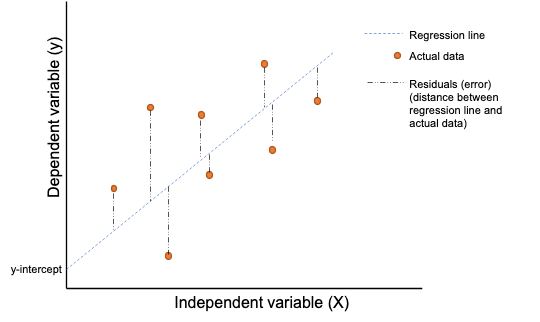

The RSS is the sum of all the residuals squared in the training data set. We square the residuals because we want to figure out how much error there is not if they are negative or positive. Here is the formula for RSS/Least Squares: $$\sum\limits_{i=1}^{n}(y_i - \hat{y})^2$$n is the number of observations in the training data, $y_i$ is the actual value of the observation in the training data, and $\hat{y}$ is the predicted value given by the linear model. We can rewrite it as: $$\sum\limits_{i=1}^{n} (y_i - (\beta_0 + \beta_1x))^2$$ Now, the way we make the estimate of our coefficients is to find the values that minimize the RSS. How do we do this?

### Estimating $\beta_0$,$\beta_1$

To find the estimates for talk about purpose of beta_0 bias $\beta_0$,$\beta_1$ that minimize the RSS, we're gonna differentiate the RSS with respect to both $\beta_0$,$\beta_1$ and set both derivatives equal to zero and solve for $\beta_0$,$\beta_1$ $$\frac{\partial{RSS}}{\partial{\beta_0}}(\sum\limits_{i=1}^{n} (y_i - (\beta_0 + \beta_1x))^2)$$ $$\frac{\partial{RSS}}{\partial{\beta_1}}(\sum\limits_{i=1}^{n} (y_i - (\beta_0 + \beta_1x))^2)$$Setting these derivatives equal to zero, then solving for $\beta_0$,$\beta_1$, we get:$$\hat{\beta_1} = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2}$$$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$ $\bar{x}$ is the average for the x values of the training data and $\bar{y}$ is the average for the y values of the training data. The hats on $\beta_0$,$\beta_1$ signify that these are estimates that minimize the training RSS.These formulas themselves and doing the differentiation and algebra to get these formulas is not really important. What's most important is understanding how we arrived at these formulas and developing the mathematical intuition behind how simple linear regression works.

## Assessing the fit of the model

### Bias-Variance Tradeoff

Before we talk about how we assess the fit of the model, let's understand what variance and bias is. Variance is a measurement of spread in a dataset. The variance of a predictive model is the spread of the predictions it gives us. The bias of a predictive model essentially measures how far away it's predictions are from the actual value its trying to predict. When building a model, we want something with both low bias and variance. 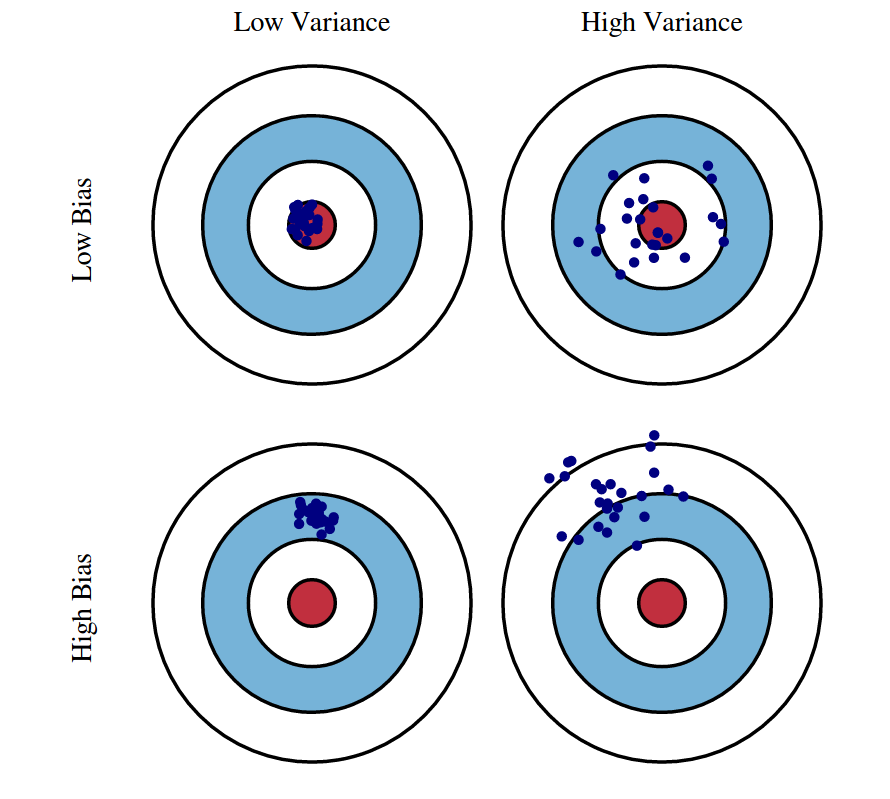

There are couple of problems when trying to achieve this. Firstly, there's underfitting which is when a model doesn't actually capture the underlying relationship of the data. This will result in high bias and low variance. This happens with stricter models. Next, there's overfitting which is when a model follows the training data too closely and doesn't perform well with data it hasnt seen yet. This will result in low bias and high variance. This happens with more flexible models. What kind of models should we use for situations with less data and situations with a lot of data?

### $R^2$

Now we want to evaluate how well the model fit the data. We do this with something called the R^2 coefficient. The mathematical formula for this is $$R^2 = \frac{TSS - RSS}{TSS}$$TSS is defined as $\sum\limits_{i=1}^{n}(y_i - \bar{y})^2$. It measures the total variance in the response y. RSS measures the amount of variability left after performing the regression. So $R^2$ measures the proportion of variability in y that can be explained using x. We want a $R^2$ coefficient that is close to 1 because that indicates that a large proportion of variability in y is explained by the regression model. Again, knowing these formulas is not the important part. It's understanding why these formulas make sense and what all these values actually mean in the context of simple linear regression.

## Building the Model

Let's now build a simple linear regression model that predicts the domestic gross of a movie based on the gross of the movie's opening weekend.  

In [194]:
import statsmodels.formula.api as smf
import statsmodels.api as sm #we are going to use the statsmodel library for buiding the model; we can use sklearn but I believe the statsmodel library provides more information
lr = smf.ols(formula = 'Gross ~ Opening',
                data = movies).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Gross   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1234.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.37e-87
Time:                        17:23:29   Log-Likelihood:                -3763.2
No. Observations:                 200   AIC:                             7530.
Df Residuals:                     198   BIC:                             7537.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.059e+06   2.74e+06      0.751      0.453   -3.34e+06    7.46e+06
Opening        2.9974      0.085     35.122      0.000       2.829       3.166
==============================================================================
Omnibus:                      252.771   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19476.981
Skew:                           5.101   Prob(JB):                         0.00
Kurtosis:                      50.256   Cond. No.                     3.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Hypothesis Testing

When we're building this model, we are also performing a hypothesis test. The null hypothesis being that that there is no relationship between X and Y and the alternative hypothesis being that there is some relationship between X and Y. In simple linear regression, rejecting the null hypothesis fully depends on the estimator of $\beta_1$ because that is the only coefficient directly affecting X. If we can show with high probability that $\beta_1$ is not 0, meaning that X affects Y, then we reject the null hypothesis. 

### Confidence Intervals

We can also get a range of values for both of our coefficients. Assuming our model is a good fit, there is a very high likely hood that our coefficients within that range. This is what a confidence interval would look like on a linear regression graph. 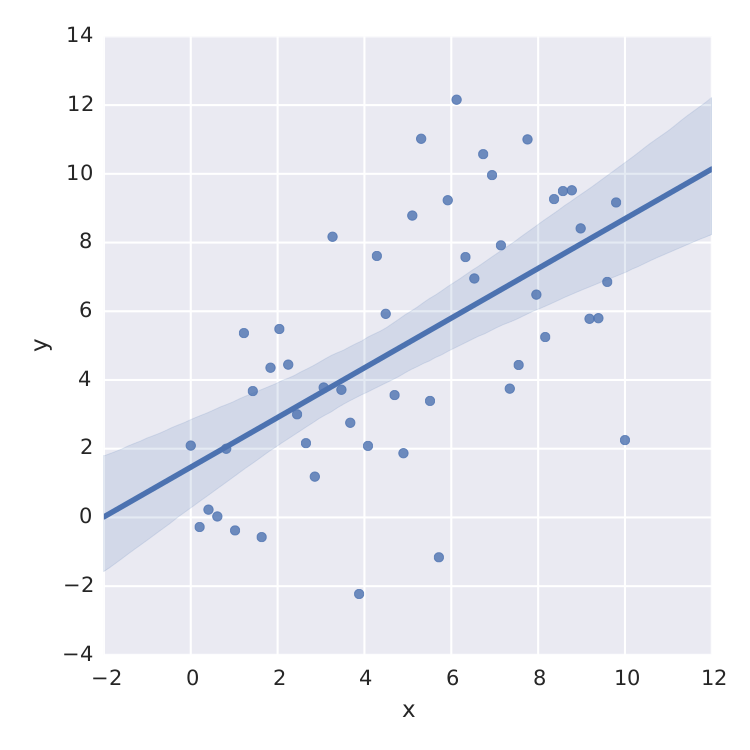

This shaded area shows all the places the regression line can be with high probability. 

## Assumptions for simple linear regression

Generally before we assess linear regression is a good model for a dataset, we check some assumptions. Know these assumptions well because they very often come up in data science interviews

What do you think the first assumption would be? The first assumption is checking whether the data is linear.  

<AxesSubplot:xlabel='Opening', ylabel='Gross'>

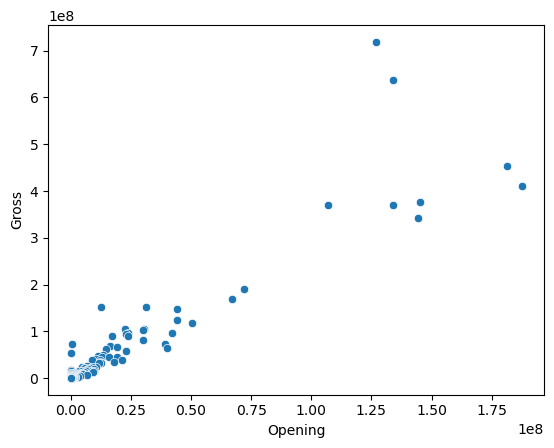

In [199]:
sns.scatterplot(x='Opening', y='Gross', data = movies)

We can see that the scatter plot looks approximately linear.

Next, let's check our other assumptions.

eval_env: 1


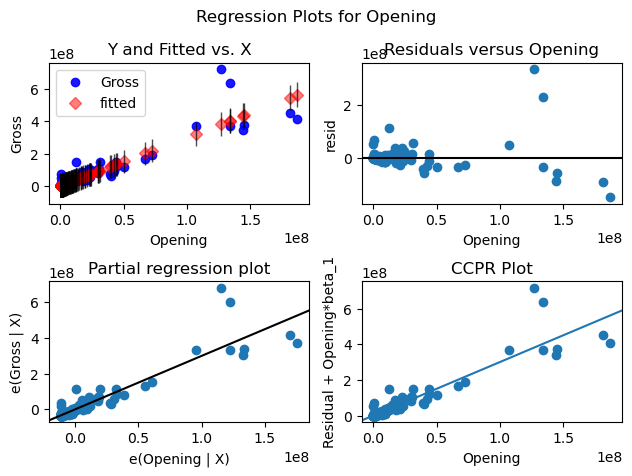

In [201]:
fig = sm.graphics.plot_regress_exog(lr, "Opening")
fig.tight_layout(pad=1.0)

The next assumption is checking for outliers and high leverage points. High leverage points are simply just points in the training data set where the y values are unusual given x. These are very similar to outliers. There are a couple of outliers and high leverage points and that may be affecting the fit. We could just remove them to make our model more accurate. We can also see that the residuals generally have constant variance and no correlation.  

This is an example of what bad residual plots looks like 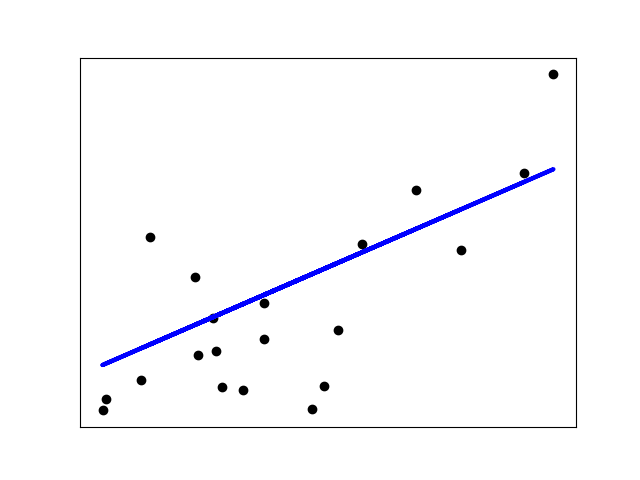 

There is technically a sixth assumption but that has to do with multiple regression. Multiple regression is just simple linear regression with multiple predictors. This sixth assumption is checking if there is  a lot of correlation between predictors. 

## Conclusion

Now, we're going to see what we can use for classification. First, let's load in the dataset we're going to be using for this.

In [103]:
candy = pd.read_csv("/Users/aniketarahane/Downloads/candy-data.csv")
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


We are going to look at if sugar percent in a candy can predict if a candy has caramel or not. Logistic regression models the probability that some x belongs to a certain class. In this case, the probability that a certain candy has caramel given its sugar percent. We could model this as: $$p(x) = \beta_0 + \beta_1x$$The problem with this is the linear model will give us values outside of 0 and 1. Since we're modeling probabilities, we want our predictions between 0 and 1. One way we can do this is by using the logistic function: add a diagram here $$\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$ talk about why we take log and why we can

If we manipulate the logistic function a bit, we get:$$\log({\frac{p(X)}{1-p(X)}}) = \beta_0 + \beta_1X$$

The left hand side of this equation is called the log odds. In logistic regression, a one unit increase in X increases the log odds by $\beta_1$. We find our estimates for $\beta_0$, $\beta_1$ by maximizing the likelihood of the function $$\prod\limits_{i = 1}^{n} probability of class 1 given X \prod\limits_{i = 1}^{n} 1-probability of class 0 given X$$

Now, let's perform logistic regression on this dataset.

First, let's create our training and test data set.

In [104]:
x = np.array(candy['sugarpercent']).reshape(-1, 1)
y = np.array(candy['fruity']).reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2) # explain what train test split
y_test

array([[1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)
predictions

/Users/aniketarahane/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
from sklearn.metrics import accuracy_score
y_test
accuracy_score = accuracy_score(predictions,y_test)
accuracy_score*100

ValueError: Found input variables with inconsistent numbers of samples: [68, 17]

talk about classes that are related; talk about 3 different metrics for evaluating accuracy